In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import splitfolders

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
splitfolders.ratio(
    input="TrashType_Image_Dataset",
    output="garbage_dataset_split",
    seed=42,
    ratio=(.7, .15, .15)
)

Copying files: 2527 files [00:06, 388.12 files/s]


In [3]:
data_train_path = "garbage_dataset_split/train"
data_val_path = "garbage_dataset_split/val" 
data_test_path = "garbage_dataset_split/test"

In [4]:
img_width = 180
img_height = 180

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 1766 files belonging to 6 classes.


In [6]:
data_cat = data_train.class_names

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 377 files belonging to 6 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)


Found 384 files belonging to 6 classes.


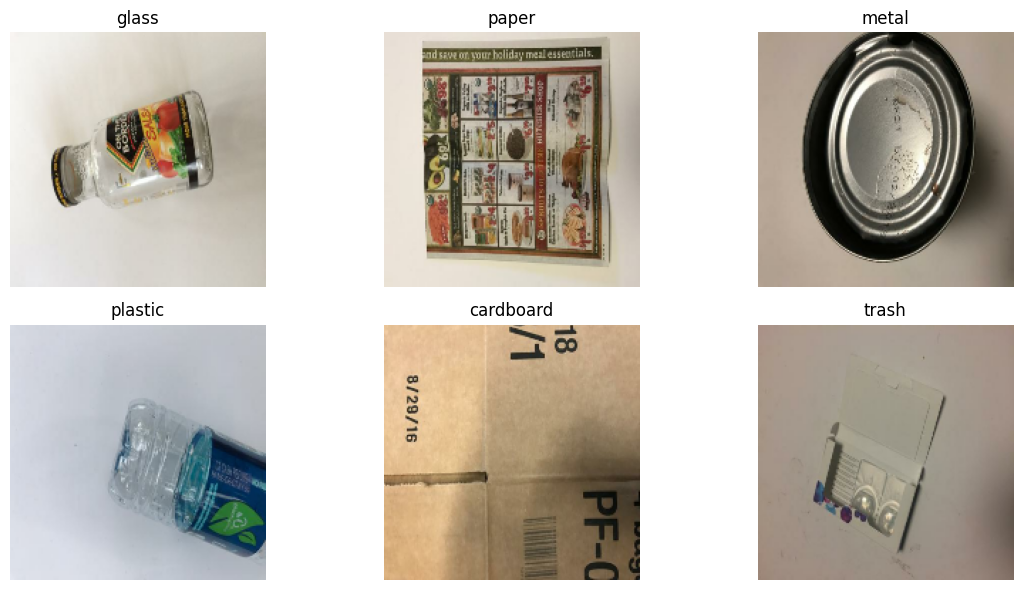

In [9]:
shown = {}

plt.figure(figsize=(12, 6))

for images, labels in data_train.unbatch().take(100):  # Scan first 100 images
    label = int(labels.numpy())
    if label not in shown:
        idx = len(shown)
        shown[label] = True
        plt.subplot(2, 3, idx + 1)
        plt.imshow(images.numpy().astype("uint8"))
        plt.title(data_cat[label])
        plt.axis("off")
    if len(shown) == len(data_cat):
        break

plt.tight_layout()
plt.show()


In [11]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 277ms/step - accuracy: 0.2999 - loss: 2.4591 - val_accuracy: 0.4244 - val_loss: 1.3865
Epoch 2/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 213ms/step - accuracy: 0.4692 - loss: 1.3164 - val_accuracy: 0.5544 - val_loss: 1.2479
Epoch 3/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 206ms/step - accuracy: 0.5824 - loss: 1.0991 - val_accuracy: 0.4695 - val_loss: 1.2847
Epoch 4/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 220ms/step - accuracy: 0.6285 - loss: 1.0057 - val_accuracy: 0.5544 - val_loss: 1.3068
Epoch 5/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 220ms/step - accuracy: 0.7378 - loss: 0.7531 - val_accuracy: 0.5729 - val_loss: 1.3052
Epoch 6/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 235ms/step - accuracy: 0.7500 - loss: 0.6448 - val_accuracy: 0.5119 - val_loss: 1.5937
Epoch 7/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 236ms/step - accuracy: 0.7801 - loss: 0.5972 - val_accuracy: 0.5305 - val_loss: 1.5776
Epoch 8/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 240ms/step - accuracy: 0.8489 - loss: 0.4171 - val_accu

Text(0.5, 1.0, 'Loss')

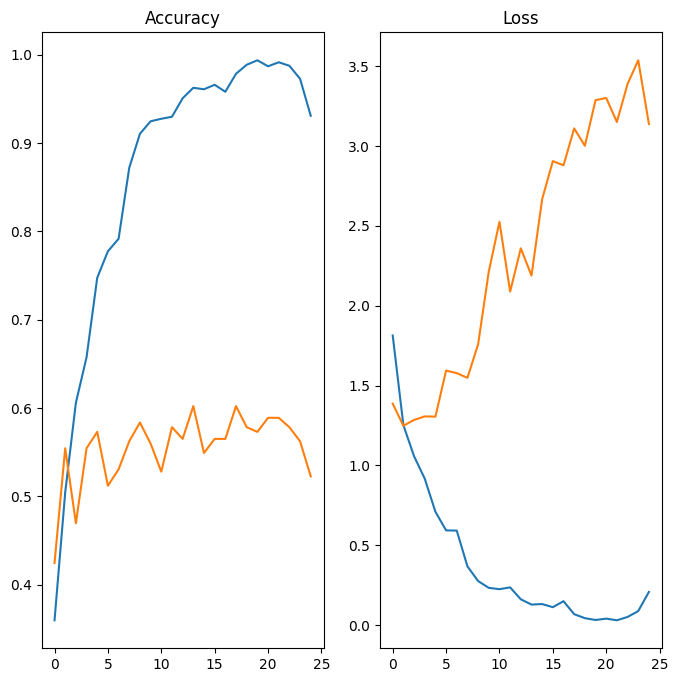

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')

In [33]:
image = 'can.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_width, img_height))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [34]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [35]:
score = tf.nn.softmax(predict[0])

In [36]:
print (f"This image most likely belongs to {data_cat[np.argmax(score)]} with a {100 * np.max(score):.2f} percent confidence.")

This image most likely belongs to metal with a 99.90 percent confidence.


In [37]:
model.save('Image_clasification.keras')